# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [39]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
# Your Code Here

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [40]:
fitbit = pd.read_csv('../data/Fitbit2.csv')
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,4.)})
sns.set_style("whitegrid")

#### From the Fitbit data, we want to visually understand:

How does the average number of steps change by month? Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or_Weekend columns.
* Set your size figure to 12,4
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [41]:
fitbit.columns

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days', 'Days_encoded', 'Work_or_Weekend',
       'Hours Sleep', 'Sleep efficiency', 'Yesterday_sleep',
       'Yesterday_sleep_efficiency', 'Months', 'Months_encoded'],
      dtype='object')

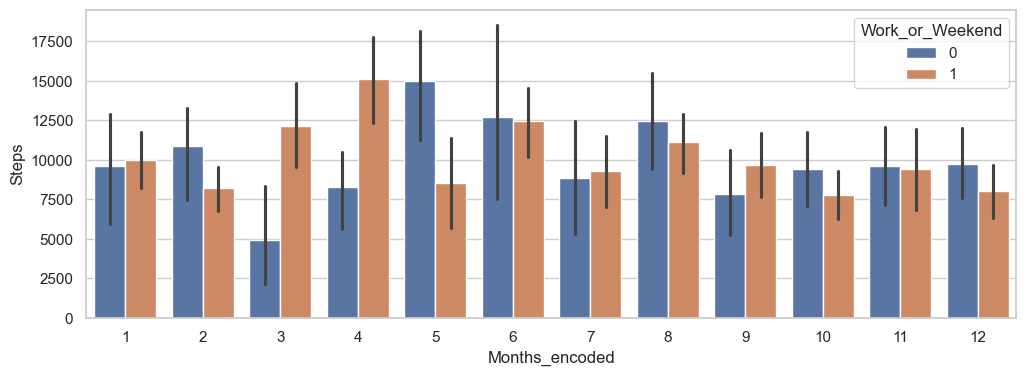

In [42]:
sns.barplot(y="Steps", x="Months_encoded", hue="Work_or_Weekend", data=fitbit);

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

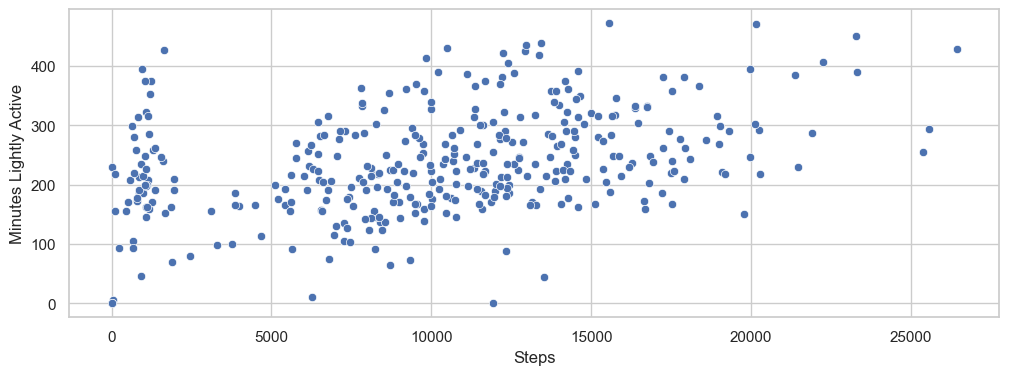

In [45]:
sns.scatterplot(x="Steps", y="Minutes Lightly Active", data=fitbit);

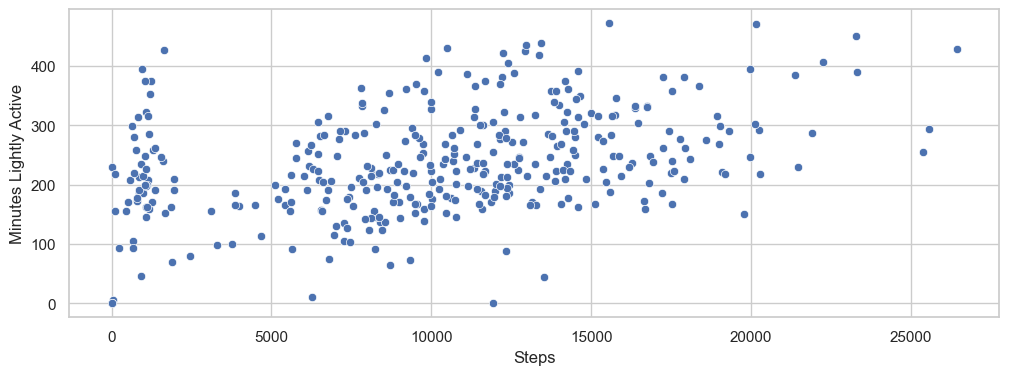

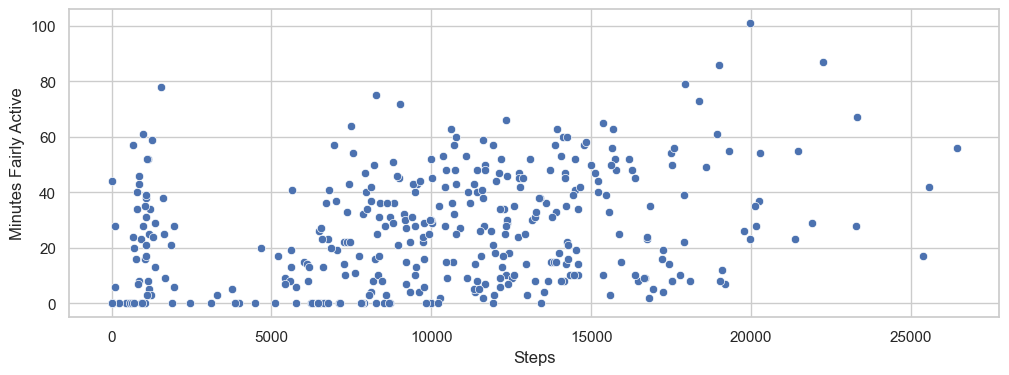

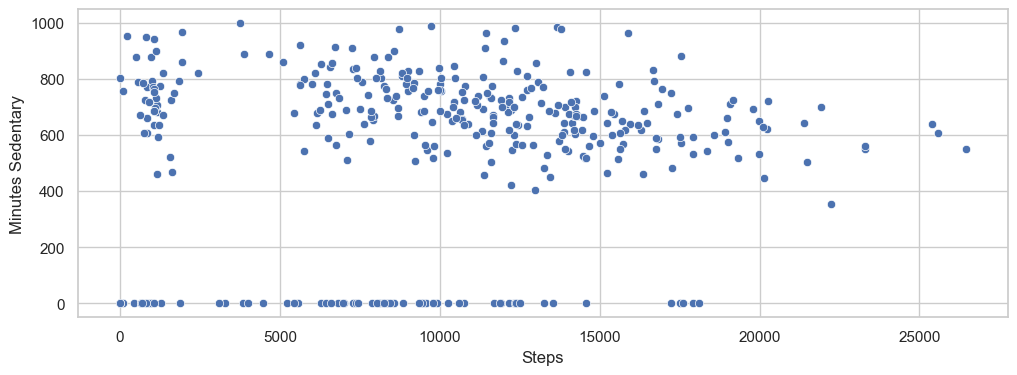

In [53]:
List_loops = (fitbit["Minutes Lightly Active"], fitbit["Minutes Fairly Active"], fitbit["Minutes Sedentary"])

for i in List_loops:
    plt.figure()
    scatter = sns.scatterplot(x="Steps", y=i, data=fitbit)
        